<h1> Implémentation des Arbres binaires avec des tuples </h1>

<h2>  1.  Représentation avec un seul tuple  </h2>

<p> Considérons l'arbre binaire suivant:

<img src =" 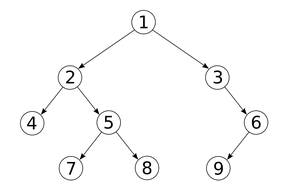" width="200px" height="200px"> </p>

<p> On représente l'arbre avec le tuple :</p>

arbre = ('1', '2', '3', '4', '5', None, '6', None, None, '7', '8', None, None, '9', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)

Chaque noeud se repère par son indice $n$ dans la liste,
* son fils gauche se trouvant alors à l’indice : $2n+ 1$ 
* son fils droit à l’indice : $2n+ 2$.

&#x2784; est à l’indice 4,  son fils gauche se trouve alors à l’indice 9 et son fils droit à l’indice 10.




In [ ]:
# on utilisera ces 2 arbres pour les tests
arbre1 = ('1', '2', '3', '4', '5', None, '6', None, None, '7', '8', None, None, '9', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
arbre2=()

<h3> Exercice 1 : Écrire une fonction booléenne qui retourne vrai si l'arbre est vide et faux sinon </h3>

In [ ]:
def est_vide(arbre):
    pass

assert est_vide(arbre1)==False
assert est_vide(arbre2)== True

<h3> Exercice 2 : a) Compléter la fonction enfant qui renvoie les enfants d’un noeud.</h3>

In [ ]:
def enfant(arbre:tuple,noeud:str)->tuple:
    if noeud in arbre:
        for i in range(len(arbre)): # on doit parcourir l'arbre pour trouver l'indice i de noeud 
            if arbre[i] == noeud:
                return ......
            
print(enfant(arbre1,"6"))

<h3> b) complèter les fonctions qui renvoient le fils gauche d’un noeud et son homologue le fils droit s’ils existent</h3>


In [ ]:
def fils_g(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            pass
            
def fils_d(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            pass            

print(fils_g(arbre1,"6"))
print(fils_d(arbre1,"3"))

<h3> Exercice 3 : a) Écrire une fonction qui retourne vrai si le noeud est la racine de l’arbre et faux sinon </h3>

In [ ]:
def est_racine(arbre,noeud):
    if noeud in arbre:
        pass
print(est_racine(arbre1,"1"))

<h3> b) Écrire une fonction qui retourne vrai si le noeud est une feuille et faux sinon.</h3>

In [ ]:
def est_feuille(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            pass
print(est_feuille(arbre1,"7"))

<h2> 2. Représentation avec un tuple de tuples  </h2>


* Chaque noeud est un tuple de 3 élements (valeur, fg , fd )

* fg et fd sont eux-mêmes des tuples éventuellement vide s'il n'éxiste pas

Ci-dessous voici l'implémentation de notre arbre :

In [ ]:
sept=("7",(),())
huit=("8",(),())
neuf=("9",(),())
six=("6",neuf,())
cinq=("5",sept,huit)
quatre=("4",(),())
trois=("3",(),six)
deux=("2",quatre,cinq)
arbre3=("1",deux,trois)
print(arbre3)

Dans cette situation on accède directement aux noeuds, ce qui permet d'écrire la fonction suivante:

In [ ]:
def est_feuille(noeud):
    return noeud[1] == () and noeud[2] == ()

print(est_feuille(trois))
print(est_feuille(sept))

<h3> Exercice 4 : La hauteur de l'arbre: </h3> 

l'algorithme récursif du calcul de la hauteur de l'arbre est :

<ul>
    <li> Si l'arbre et vide</li>
    <ul><li> renvoyer -1</li></ul>
    <li> Sinon</li>
    <ul>
        <li> h1 = hauteur(fils_gauche)</li>
        <li> h2 = hauteur(fils_droit)</li>
        <li> renvoyer 1+ max(h1,h2)</li></ul>
    </ul>

attention : dans certains énoncés, la hauteur de l'arbre vide est 0 et non -1 !

<h4>Écrire la fonction hauteur</h4>

In [ ]:
def hauteur(arbre):
    pass

print(hauteur(arbre3))

<h2> Pour représenter un arbre on utilisera les modules networkx et matplotlib. </h2>
<p> Ci-dessous le programme qui permet d'afficher un arbre : </p>

<i> il nécessite d'avoir réussi la fonction hauteur </i>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(8,8), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if arbre !=():
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre[0])
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre[1], noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre[2], noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre ==():
        return
    
    branches = [[]]
    profondeur = hauteur(arbre)
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre[0])}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre[1], noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre[2], noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()

In [ ]:
repr_graph(arbre3,(4,3),False)

<h3> Exercice 5 : </h3>

Écrire les fonctions suivantes

Tester ces fonctions avec arbre3 defini ci-dessus

In [ ]:
def taille(arbre):
    """fonction qui prend en paramètre d'entrée un arbre et qui renvoie le nombre de ses noeuds"""
    pass

In [ ]:
def est_presente(arbre,etiquette):
     """fonction qui prend en paramètre d'entrée un arbre et une etiquette 
     et renvoie True si etiquette est dans l'arbre ou False sinon"""
    pass

In [ ]:
def nb_feuilles(arbre):
    """fonction qui prend en paramètre d'entrée un arbre et renvoie le nombre de ses feuilles"""
    pass

<h3> Exercice 6 :  Définir l'arbre2 de la fiche de cours, l'afficher et tester les fonctions précédentes sur cet arbre </h3>